In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
X_full = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

In [ ]:
X_full.shape

768 samples with 9 features

In [ ]:
X_full.info()

there is no catigorical features or missing values

In [ ]:
X_full.describe()

['Pregnancies',Glucose',BloodPressure','SkinThickness','Insulin','BMI'] canot have 0 as value but the min is 0 so replace it with the mdian value

In [ ]:
print('Number of rows missing Glucose: {0}'.format(len(X_full.loc[X_full['Glucose'] == 0])))
print('Number of rows missing Blood Pressure: {0}'.format(len(X_full.loc[X_full['BloodPressure'] == 0])))
print('Number of rows missing Insulin: {0}'.format(len(X_full.loc[X_full['Insulin'] == 0])))
print('Number of rows missing BMI: {0}'.format(len(X_full.loc[X_full['BMI'] == 0])))
print('Number of rows missing Skin Thickness: {0}'.format(len(X_full.loc[X_full['SkinThickness'] == 0])))
print('Number of rows missing Age: {0}'.format(len(X_full.loc[X_full['Age'] == 0])))

In [ ]:
x = X_full['Glucose'].median()
X_full['Glucose'].replace(0,x,inplace=True)
x = X_full['BloodPressure'].median()
X_full['BloodPressure'].replace(0,x,inplace=True)
x = X_full['Insulin'].median()
X_full['Insulin'].replace(0,x,inplace=True)
x = X_full['BMI'].median()
X_full['BMI'].replace(0,x,inplace=True)
x = X_full['SkinThickness'].median()
X_full['SkinThickness'].replace(0,x,inplace=True)

In [ ]:
figure = plt.figure(figsize =(10,10))
sns.heatmap(X_full.corr(),annot=True,cmap="YlGnBu")

outcome is highly correlated with ['Glucose','BMI','Age','Pregriancies']

In [ ]:
X_full['Outcome'].value_counts()

will have to make statified sampling to over come the difference between count of 0 and 1 samples

In [ ]:
X_full.isna().sum(axis=0)

there is not a number in the data

In [ ]:
len(X_full['Age'].unique())

In [ ]:
figure = plt.figure(figsize =(6,6))
ax = sns.histplot(x="Age",hue ="Outcome" ,data=X_full,multiple="dodge", shrink=.8)

In [ ]:
plt.hist(X_full['BMI'],bins=100)
plt.show()

## If woman BMI is:

1. below 18.5 – she is in the underweight range -> 0
1. between 18.5 and 24.9 – she is in the healthy weight range -> 1
1. between 25 and 29.9 – she is in the overweight range -> 2
1. between 30 and 39.9 – she is in the obese range -> 3
1. other -> 4

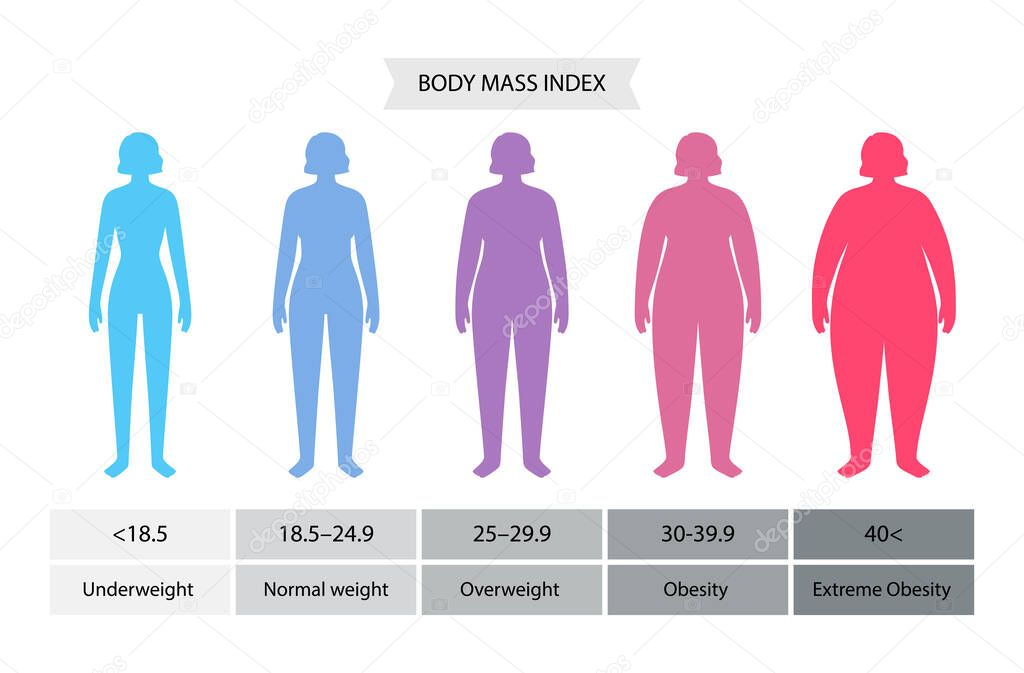

In [ ]:
X_full['BMI_levels']=pd.cut(X_full['BMI'],bins=[0, 18.5, 24.99, 29.99,34.99,39.99,100],labels=[0,1,2,3,4,5])

In [ ]:
plt.hist(X_full['BMI_levels'])
plt.show()

In [ ]:
figure = plt.figure(figsize =(6,6))
ax = sns.histplot(x = 'BMI_levels',hue ="Outcome",data=X_full ,multiple="dodge", shrink=.8 )

In [ ]:
plt.hist(X_full['Glucose'],bins=100)
plt.show()

## For a 2 hour GTT"glucose tolerance test" with 75 g intake
1. a glucose level below 7.8 mmol/L (140 mg/dL) is normal
1. Blood plasma glucose between 7.8 mmol/L (140 mg/dL) and 11.1 mmol/L (200 mg/dL) indicate "impaired glucose tolerance"
1. and levels at or above 11.1 mmol/L at 2 hours confirm a diagnosis of diabetes

In [ ]:
X_full['Glucose_levels']=pd.cut(X_full['Glucose'],bins=[0, 140 , 200],labels=[0,1])

In [ ]:
figure = plt.figure(figsize =(6,6))
ax = sns.histplot(x = 'Glucose_levels',hue ="Outcome",data=X_full,multiple="dodge", shrink=.8 )

In [ ]:
X_full.head()

In [ ]:
X_org = X_full.drop(columns=['BMI_levels','Glucose_levels'])

### Splitting the dataset for training & testing and standardizing the data¶


In [ ]:
Y = X_full['Outcome']
X = X_full.drop(columns=['Outcome'])
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify = Y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## cross validation over multibli models

### SVM

In [ ]:
from sklearn import svm
support_vector_classifier = svm.SVC(kernel="linear",).fit(X_train_scaled,y_train)
y_pred = support_vector_classifier.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))
print(accuracy_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
y_trainpred = support_vector_classifier.predict(X_train_scaled)
print("The mean squared error of train is:",mse(y_train,y_trainpred))

In [ ]:
print("The mean squared error of test is:",mse(y_test,y_pred))

In [ ]:
svm_params ={"C":np.arange(1,20)}
svms = svm.SVC(kernel="linear")
svm_cv = GridSearchCV(svms,svm_params,cv=8)
svm_cv.fit(X_train_scaled,y_train)
print(svm_cv.best_score_)
print(svm_cv.best_params_)

In [ ]:
svm_tuned = svm.SVC(kernel="linear",C=2).fit(X_train_scaled,y_train)
y_pred2 = svm_tuned.predict(X_test_scaled)
cm2 = confusion_matrix(y_test,y_pred2)
print(cm2)
print(accuracy_score(y_test,y_pred2))

In [ ]:
print(classification_report(y_test,y_pred2))

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(random_state=0).fit(X_train_scaled,y_train)
LRy_pred = LRmodel.predict(X_test_scaled)
LRcm = confusion_matrix(y_test,LRy_pred)
print("Our Accuracy is: ", (LRcm[0][0]+LRcm[1][1])/(LRcm[0][0]+LRcm[1][1]+LRcm[0][1]+LRcm[1][0]))
print(accuracy_score(y_test,LRy_pred))

In [ ]:
print(classification_report(y_test,LRy_pred))

In [ ]:
LR_params ={"C":np.arange(1,20)}
LRs = LogisticRegression(random_state=0)
LR_cv = GridSearchCV(LRs,LR_params,cv=8)
LR_cv.fit(X_train_scaled,y_train)
print(LR_cv.best_score_)
print(LR_cv.best_params_)

In [ ]:
LR_tuned = LogisticRegression(random_state=0,C=3).fit(X_train_scaled,y_train)
LRy_pred2 = LR_tuned.predict(X_test_scaled)
LRcm2 = confusion_matrix(y_test,LRy_pred2)
print(LRcm2)
print(accuracy_score(y_test,LRy_pred2))

In [ ]:
print(classification_report(y_test,LRy_pred2))